In [3]:
import pandas as pd
import glob

# Find all CSV files with suffix 'test'
csv_files = glob.glob('/home/ihossain/ISMAIL/SSL-malware/results_ours/*[0-9]_test.csv')

# Read each CSV file into a DataFrame and store them in a list
dataframes = [pd.read_csv(file) for file in csv_files]

# Optionally, you can concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)


In [6]:
combined_df.head()

,date\tTPR\tTNR\tFPR\tFNR\tACC\tPREC\tF1
0,2013-07\t0.8300\t0.9947\t0.0053\t0.1700\t0.978...
1,2013-08\t0.7727\t0.9923\t0.0077\t0.2273\t0.970...
2,2013-09\t0.7740\t0.9931\t0.0069\t0.2260\t0.971...
3,2013-10\t0.7194\t0.9924\t0.0076\t0.2806\t0.965...
4,2013-11\t0.7051\t0.9951\t0.0049\t0.2949\t0.966...


In [1]:
import pandas as pd
import glob
combined_df = pd.read_csv("/home/ihossain/ISMAIL/SSL-malware/results_ours/ssl-loss/gen_apigraph_03.18-11.56.07_100_cosine_1000_test.csv")

In [2]:
# Split the single column into multiple columns using tab as the delimiter
combined_df = combined_df['date\tTPR\tTNR\tFPR\tFNR\tACC\tPREC\tF1'].str.split('\t', expand=True)

# Rename the columns
combined_df.columns = ['date', 'TPR', 'TNR', 'FPR', 'FNR', 'ACC', 'PREC', 'F1']


In [3]:
# Display the updated DataFrame
combined_df.head(10)

,date,TPR,TNR,FPR,FNR,ACC,PREC,F1
0,2013-08,0.6983,0.9954,0.0046,0.3017,0.9659,0.9441,0.8029
1,2013-09,0.7420,0.9931,0.0069,0.2580,0.9679,0.9229,0.8226
2,2013-10,0.6493,0.9960,0.0040,0.3507,0.9613,0.9474,0.7705
3,2013-11,0.7717,0.9920,0.0080,0.2283,0.9700,0.9139,0.8368
4,2013-12,0.6754,0.9947,0.0053,0.3246,0.9627,0.9335,0.7837
5,2014-01,0.5842,0.9929,0.0071,0.4158,0.9524,0.9000,0.7085
6,2014-02,0.6141,0.9920,0.0080,0.3859,0.9544,0.8941,0.7281
7,2014-03,0.5789,0.9840,0.0160,0.4211,0.9438,0.7989,0.6714
8,2014-04,0.5432,0.9890,0.0110,0.4568,0.9447,0.8445,0.6611
9,2014-05,0.6076,0.9880,0.0120,0.3924,0.9501,0.8483,0.7081


In [4]:
# Convert columns to numeric, except for the date column
for col in combined_df.columns[1:]:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Calculate the average of the specified columns
average_values = combined_df[['TPR', 'TNR', 'FPR', 'FNR', 'ACC', 'PREC', 'F1']].mean()


In [5]:
# Print the average values
print("Average:", average_values)

Average: TPR     0.421907
TNR     0.993693
FPR     0.006307
FNR     0.578093
ACC     0.938898
PREC    0.865148
F1      0.550585
dtype: float64


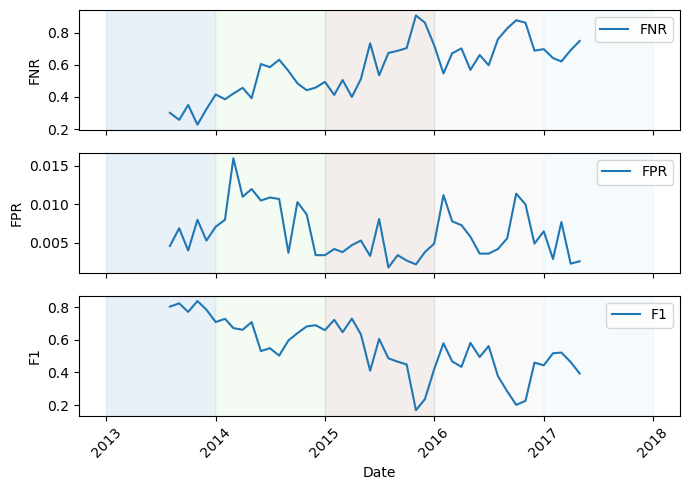

In [6]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm

# Convert columns to numeric, except for the date column
for col in combined_df.columns[1:]:
    combined_df[col] = pd.to_numeric(combined_df[col])

# Convert the 'date' column to datetime
combined_df['date'] = pd.to_datetime(combined_df['date'], format='%Y-%m')

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Columns to plot
columns_to_plot = ['FNR', 'FPR', 'F1']

# Get unique years and create a color map
years = combined_df['date'].dt.year.unique()
colors = cm.get_cmap('tab20', len(years))

# Plot each specified column against the date column
for i, col in enumerate(columns_to_plot):
    axs[i].plot(combined_df['date'], combined_df[col], label=col)
    axs[i].set_ylabel(col)
    axs[i].legend()

    # Highlight the portion from the first month to the last month of each year with different colors
    for j, year in enumerate(years):
        start_date = f'{year}-01-01'
        end_date = f'{year}-12-31'
        axs[i].axvspan(start_date, end_date, color=colors(j), alpha=0.1)

# Set the x-axis label for the last subplot
axs[-1].set_xlabel('Date')

# Format the x-axis to show only the years
axs[-1].xaxis.set_major_locator(mdates.YearLocator())
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [3]:
# pip install sentence_transformers

In [ ]:
# import pandas as pd
# from sentence_transformers import SentenceTransformer, util

# # Load a sentence transformer model for semantic similarity
# model = SentenceTransformer('all-MiniLM-L6-v2')

# # Sample compliance data
# extracted_rules = [
#     "NRC 1.206 requires annual cybersecurity risk assessments.",
#     "IAEA requires safety drills every year.",
#     "NRC regulations require daily radiation exposure monitoring.",
#     "Emergency shutdown tests must be conducted quarterly."
# ]

# llm_responses = [
#     "Cybersecurity logs should be updated annually as per NRC guidelines.",
#     "IAEA recommends safety drills at least once per year.",
#     "NRC regulations require daily radiation exposure monitoring.",
#     "Emergency shutdown tests should be conducted quarterly."
# ]

# # Compute similarity scores between extracted rules and LLM responses
# similarity_scores = [
#     round(util.pytorch_cos_sim(model.encode(extracted_rules[i]), model.encode(llm_responses[i])).item() * 100, 1)
#     for i in range(len(extracted_rules))
# ]

# # Create DataFrame for similarity score table
# df_similarity = pd.DataFrame({
#     "Extracted Rule": extracted_rules,
#     "LLM Response": llm_responses,
#     "Similarity Score (%)": similarity_scores
# })

# # Generate LaTeX table for similarity score report
# latex_similarity = df_similarity.to_latex(index=False, caption="Updated Compliance Report with LLM Similarity Scores", label="tab:updated_compliance_similarity")

# # Save LaTeX content to a file
# with open("compliance_similarity_report.tex", "w") as f:
#     f.write(latex_similarity)

# # Print LaTeX table output
# print(latex_similarity)


\begin{table}
\centering
\caption{Updated Compliance Report with LLM Similarity Scores}
\label{tab:updated_compliance_similarity}
\begin{tabular}{llr}
\toprule
                                    Extracted Rule &                                       LLM Response &  Similarity Score (\%) \\
\midrule
NRC 1.206 requires annual cybersecurity risk as... & Cybersecurity logs should be updated annually a... &                  60.8 \\
           IAEA requires safety drills every year. & IAEA recommends safety drills at least once per... &                  86.8 \\
NRC regulations require daily radiation exposur... & NRC regulations require daily radiation exposur... &                 100.0 \\
Emergency shutdown tests must be conducted quar... & Emergency shutdown tests should be conducted qu... &                  96.8 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_2270861/1679441235.py:36: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_similarity = df_similarity.to_latex(index=False, caption="Updated Compliance Report with LLM Similarity Scores", label="tab:updated_compliance_similarity")
